神經元

In [ ]:
import numpy as np

class Neuron: #神經元
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward_sigmoid(self, inputs):
        # 將權重和輸入相乘，加上偏差，然後使用sigmoid激活函數
        total = np.dot(self.weights, inputs) + self.bias
        return self.sigmoid(total)

    def feedforward_staturating_linear(self, inputs):
        # 將權重和輸入相乘，加上偏差，然後使用staturating_linear激活函數
        total = np.dot(self.weights, inputs) + self.bias
        return self.staturating_linear(total)

    def feedforward_hard_limit(self, inputs):
        # 將權重和輸入相乘，加上偏差，然後使用hard_limit激活函數
        total = np.dot(self.weights, inputs) + self.bias
        return self.hard_limit(total)

    def sigmoid(self, x):
        # Sigmoid 激活函數
        return 1 / (1 + np.exp(-x))

    def staturating_linear(self, x):
        # staturating_linear 激活函數
        if x<0:
          return 0
        elif x>1:
          return 1
        else:
          return x

    def hard_limit(self, x):
        # hard_limit 激活函數
        if x>=0:
          return 1
        else:
          return 0


weights = np.array([1,1,1]) # 權重weight

bias = 1  #閥值bias

n = Neuron(weights, bias) # 神經元Neuron

x = np.array([1,2,3])  # 輸入值input

print(n.feedforward_sigmoid(x))  # 輸出值output

0.9990889488055994


類神經網路

In [ ]:
class NeuralNetwork: #類神經網路
    def __init__(self, neurons):
        self.neurons = neurons

    def feedforward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.feedforward_sigmoid(inputs))
        return outputs

neuron1 = Neuron(weights=np.array([1, 1, 1]), bias=1) #神經元參數設定
neuron2 = Neuron(weights=np.array([1, 1, 1]), bias=1)
neuron3 = Neuron(weights=np.array([1, 1, 1]), bias=1)

neural_network = NeuralNetwork([neuron1, neuron2, neuron3]) #可彈性決定神經元的數量

x = np.array([1, 2, 3])  # 輸入值input

print(neural_network.feedforward(x))  # 輸出值output


[0.9990889488055994, 0.9990889488055994, 0.9990889488055994]


多層神經網路

In [ ]:
class MultipleNeuralNetwork:
    def __init__(self, layer1, layer2, layer3, output_layer):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
        self.output_layer = output_layer

    def feedforward(self, inputs):
        layer1_outputs = [neuron.feedforward_sigmoid(inputs) for neuron in self.layer1]
        layer2_outputs = [neuron.feedforward_staturating_linear(layer1_outputs) for neuron in self.layer2]
        layer3_outputs = [neuron.feedforward_hard_limit(layer2_outputs) for neuron in self.layer3]
        #output = [neuron.feedforward_hard_limit(hidden2_outputs) for neuron in self.output_layer]
        return layer3_outputs

# 定義第一層(3個神經元)
layer1_neuron1 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer1_neuron2 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer1_neuron3 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer1 = [layer1_neuron1, layer1_neuron2, layer1_neuron3]

# 定義第二層(6個神經元)
layer2_neuron1 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2_neuron2 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2_neuron3 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2_neuron4 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2_neuron5 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2_neuron6 = Neuron(weights=np.array([1, 1, 1]), bias=1)
layer2 = [layer2_neuron1, layer2_neuron2, layer2_neuron3, layer2_neuron4, layer2_neuron5, layer2_neuron6]

# 定義第三層(2個神經元)
layer3_neuron1 = Neuron(weights=np.array([1, 1, 1, 1, 1, 1]), bias=1)
layer3_neuron2 = Neuron(weights=np.array([1, 1, 1, 1, 1, 1]), bias=1)
layer3 = [layer3_neuron1, layer3_neuron2]

# 定義輸出層
output_layer_neuron1 = Neuron(weights=np.array([1, 1]), bias=1)
output_layer = [output_layer_neuron1]

# 創建神經網路
neural_network = MultipleNeuralNetwork(layer1, layer2, layer3, output_layer)

x = np.array([1, 2, 3])  # 輸入值input

print(neural_network.feedforward(x))  # 輸出值output


[1, 1]


歸屬度menbership function

In [ ]:
import numpy as np
def generate_menbership(h): #建立menbership function
  c = 3
  e = 1.5
  f = np.exp(-((h-c)*(h-c))/(2*e*e))
  return f


menbership_list = []
x_list = []
for i in range(1000): #產生1000個點
  x_list.append(i+1)
  h = (1+i)*(6/1000)
  menbership_list.append(generate_menbership(h))

In [ ]:
import matplotlib.pyplot as plt
def draw(x_list,menbership_list,name):
  # 示例数据：x 和 y 是列表，存储了要绘制的点的坐标
  x = x_list
  y = menbership_list

  # 绘制散点图
  plt.figure(figsize=(8, 6))  # 设置图形大小（可选）
  plt.scatter(x, y, color='blue', marker='o', label='Scatter Plot')  # 绘制散点图
  plt.title(name)  # 设置标题
  plt.xlabel('hi')  # 设置 x 轴标签
  plt.ylabel('menbership degree')  # 设置 y 轴标签
  #plt.legend()  # 显示图例
  plt.grid(True)  # 显示网格
  plt.show()  # 显示图形

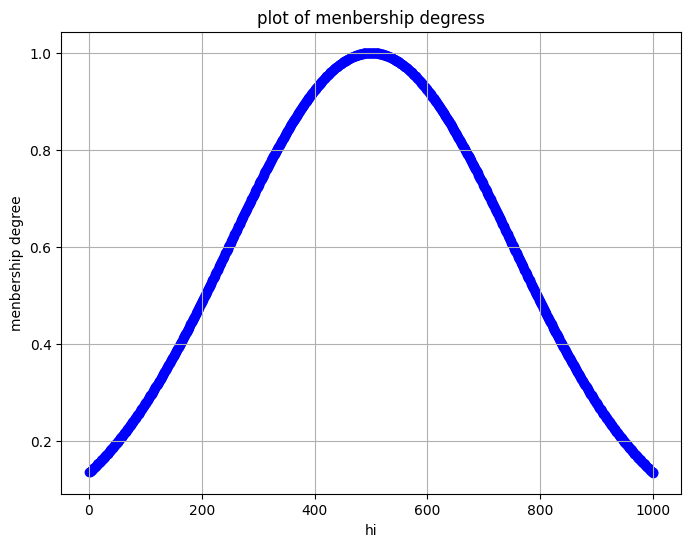

In [ ]:
draw(x_list,menbership_list,"plot of menbership degress")

In [ ]:
import sympy as sp

# 定义符号变量
h, c, sigma = sp.symbols('h c sigma')

# 定义自然常数 e
e = sp.E

# 定义函数 f(h, c, sigma)，这里以 e 为底的指数函数作为示例
f = sp.exp(-((h-c)*(h-c))/(2*sigma*sigma))

# 求 f 对 h 的一阶偏导数
df_dh = sp.diff(f, h)
def one_h(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dh
  return f
#print("偏导数 df/dh =", df_dh)

# 求 f 对 c 的一阶偏导数
df_dc = sp.diff(f, c)
def one_c(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dc
  return f
#print("偏导数 df/dc =", df_dc)

# 求 f 对 sigma 的一阶偏导数
df_dsigma = sp.diff(f, sigma)
def one_sigma(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dsigma
  return f
#print("偏导数 df/dsigma =", df_dsigma)

def one():

  for i in range(1000):
    # 定义变量的数值
    h_value = (i+1)*(6/1000)
    c_value = 3
    sigma_value = 1.5

    # 使用 subs() 方法将符号变量替换为具体的数值，然后使用 evalf() 方法进行数值求解
    df_dh_value = df_dh.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    df_dc_value = df_dc.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    df_dsigma_value = df_dsigma.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    menbership_list_dc.append(df_dc_value)
    menbership_list_dh.append(df_dh_value)
    menbership_list_dsigma.append(df_dsigma_value)
    #print(df_dh_value)



In [ ]:
menbership_list_dh = []
menbership_list_dc = []
menbership_list_dsigma = []
x_list = []
for i in range(1000): #產生1000個點
  x_list.append(i+1)
one()


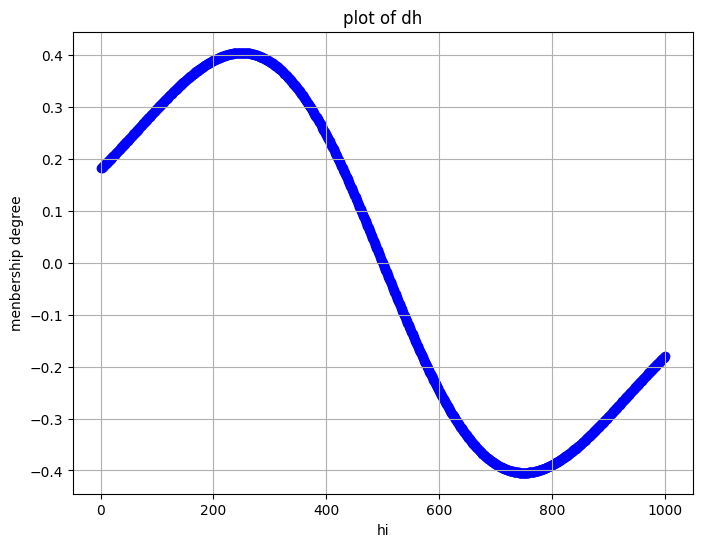

In [ ]:
draw(x_list,menbership_list_dh,"plot of dh")

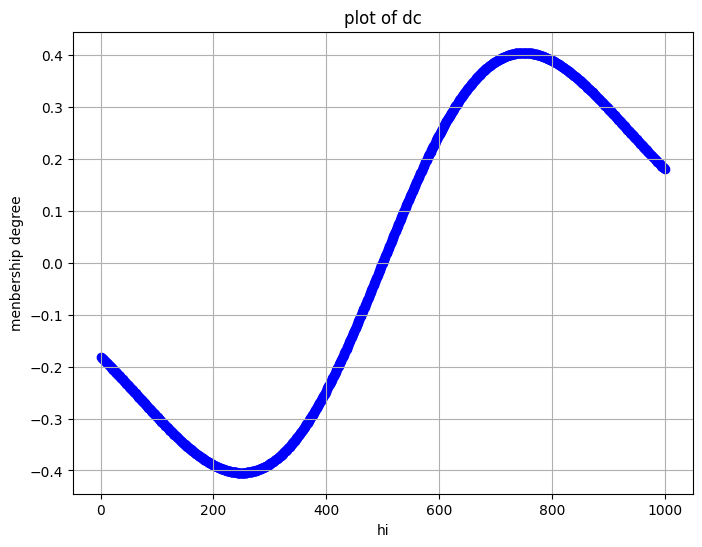

In [ ]:
draw(x_list,menbership_list_dc,"plot of dc")

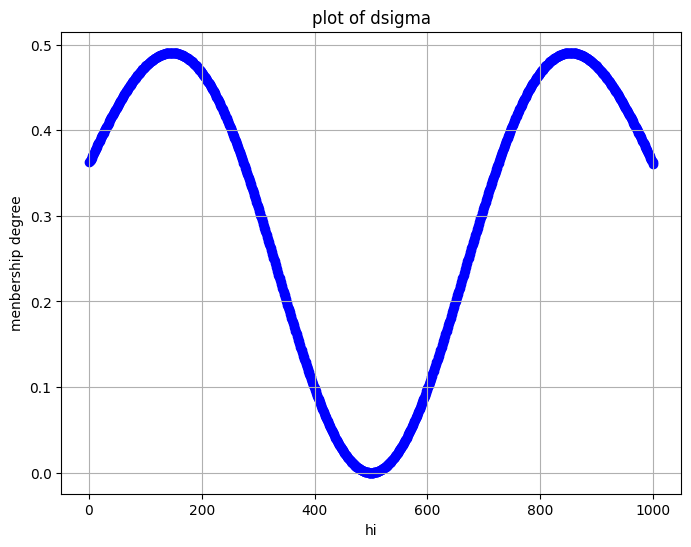

In [ ]:
draw(x_list,menbership_list_dsigma,"plot of dsigma")

In [ ]:
import sympy as sp

# 定义符号变量
h, c, sigma = sp.symbols('h c sigma')

# 定义自然常数 e
e = sp.E

# 定义函数 f(h, c, sigma)，这里以 e 为底的指数函数作为示例
f = sp.exp(-((h-c)*(h-c))/(2*sigma*sigma))

# 求 f 对 h 的二阶偏导数
df_dh = sp.diff(f, h,2)
def two_h(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dh
  return f
#print("偏导数 df/dh =", df_dh)

# 求 f 对 c 的二阶偏导数
df_dc = sp.diff(f, c,2)
def two_c(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dc
  return f
#print("偏导数 df/dc =", df_dc)

# 求 f 对 sigma 的二阶偏导数
df_dsigma = sp.diff(f, sigma,2)
def two_sigma(h): #建立menbership function
  c = 3
  sigma = 1.5
  f = df_dsigma
  return f
#print("偏导数 df/dsigma =", df_dsigma)

def two():

  for i in range(1000):
    # 定义变量的数值
    h_value = (i+1)*(6/1000)
    c_value = 3
    sigma_value = 1.5

    # 使用 subs() 方法将符号变量替换为具体的数值，然后使用 evalf() 方法进行数值求解
    df_dh_value = df_dh.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    df_dc_value = df_dc.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    df_dsigma_value = df_dsigma.subs([(h, h_value), (c, c_value), (sigma, sigma_value)]).evalf()
    menbership_list_d2c.append(df_dc_value)
    menbership_list_d2h.append(df_dh_value)
    menbership_list_d2sigma.append(df_dsigma_value)
    #print(df_dh_value)

In [ ]:
menbership_list_d2h = []
menbership_list_d2c = []
menbership_list_d2sigma = []
x_list = []
for i in range(1000): #產生1000個點
  x_list.append(i+1)
two()


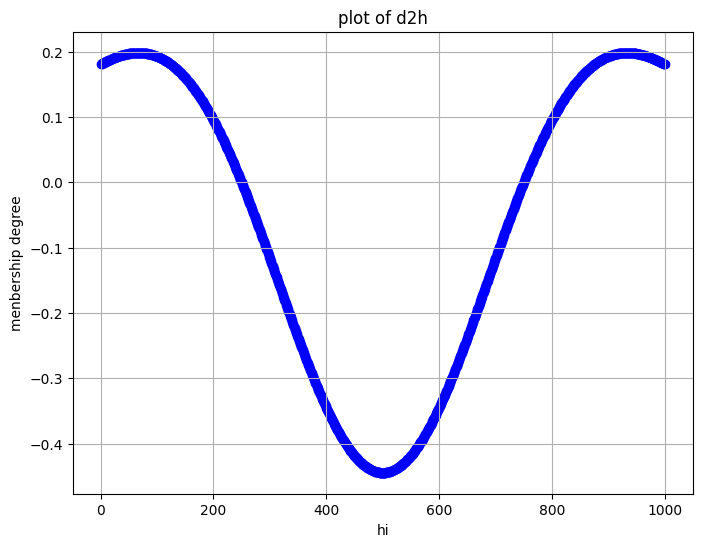

In [ ]:
draw(x_list,menbership_list_d2h,"plot of d2h")

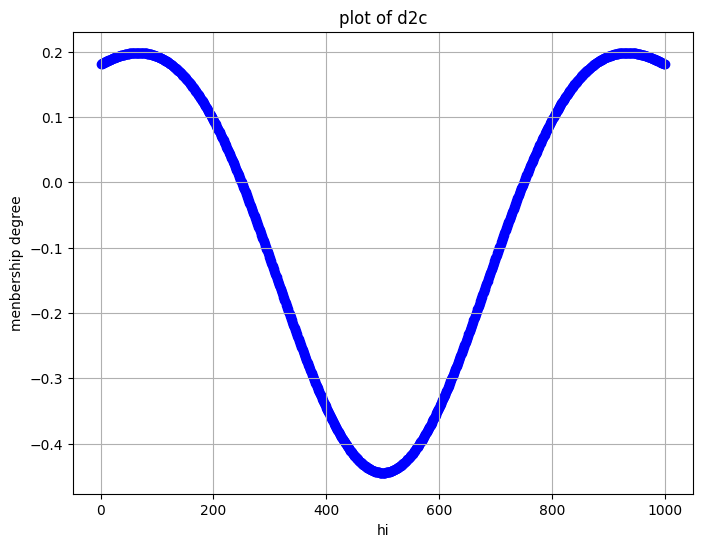

In [ ]:
draw(x_list,menbership_list_d2c,"plot of d2c")

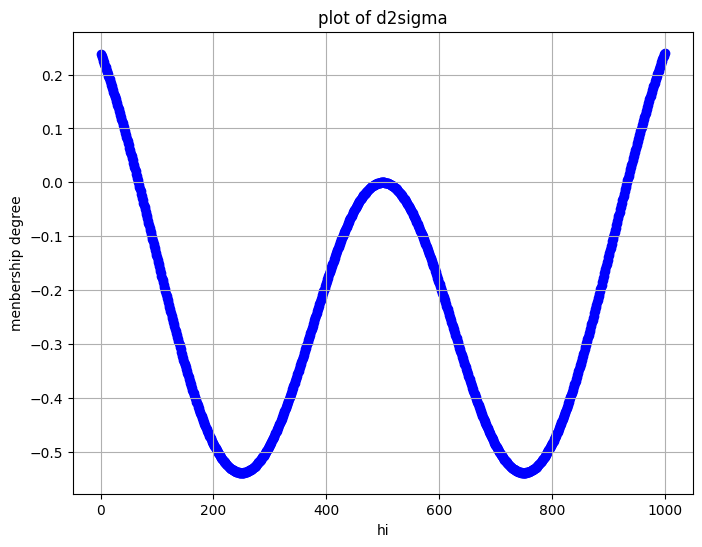

In [ ]:
draw(x_list,menbership_list_d2sigma,"plot of d2sigma")

模型建立，用if-then rule建立模糊推理系統

輸入資料

In [ ]:
#將-5<=h<=5，切成1000等分，再將h1和h2建立成數據對
import numpy as np

h1 = np.linspace(-5, 5, 1000)
h2 = np.linspace(-5, 5, 1000)
data_pair = [] #共有10^6個數據對
for i in h1:
  for r in h2:
    a = [i , r]
    data_pair.append(a)

輸入語意變數的模糊集

In [ ]:
#x1和x2分別有2和3個高斯模糊集，-4<=c<=4，0<sigma<=2
import numpy as np

# 定义模糊集的中心和标准差参数范围
c_range = np.linspace(-4, 4, 5)  # 中心 c_j 的取值范围，共有 5 个模糊集
sigma_range = np.linspace(0.1, 2, 5)  # 标准差 sigma_j 的取值范围，共有 5 个模糊集

# 构建 FIS 模型的前件部分 (If-parts)
if_parts = []

#x1的高絲模糊集，2個
def a1(h):
  a1 = np.exp(-((h - c_range[0])**2)/(2*sigma_range[0]**2))
  return a1
def a2(h):
  a2 = np.exp(-((h - c_range[1])**2)/(2*sigma_range[1]**2))
  return a2

#x2的高絲模糊集，3個
def b1(h):
  b1 = np.exp(-((h - c_range[2])**2)/(2*sigma_range[2]**2))
  return b1
def b2(h):
  b2 = np.exp(-((h - c_range[3])**2)/(2*sigma_range[3]**2))
  return b2
def b3(h):
  b3 = np.exp(-((h - c_range[4])**2)/(2*sigma_range[4]**2))
  return b3

# 总共生成的模糊条件数量 2*3=6
# [a1(h),b1(h)],[a1(h),b2(h)],[a1(h),b2(h)],[a2(h),b1(h)],[a2(h),b2(h)],[a2(h),b3(h)]
#後鑑部參數
a0 = [-0.6, 0.3, -0.1 , 0.6, 0.7, -0.6]
a1 = [0.5, 0.9, 0.4, -0.6, 0.2, -0.9]
a2 = [0.3, -0.5, 0, 0.5, -0.9, 0]




正規化強度計算

In [ ]:
#強度公式為 lamda(k) = beta(k)/sum(k)(beta)
#beta = ∏ 𝐴𝑖(𝑘)(ℎ𝑖)
#𝐴𝑖(𝑘)(ℎ𝑖)表示第𝑘條規則於前述之第𝑖維的高斯型模糊集。

import numpy as np

# 定义模糊规则的数量 K 和输入变量的维数 n
K = 6  # 假设有 5 条模糊规则
n = 2  # 假设每个规则涉及 3 个输入变量

# 模拟模糊规则的隶属度值，这里使用随机值作为示例
# 假设每个规则的隶属度值存储在一个二维数组 beta，其中 beta[k][i] 表示第 k 条规则对第 i 维输入变量的隶属度值
beta = np.random.rand(K, n)  # 随机生成 K 条规则、n 个变量的隶属度值

# 计算未经正规化的启动强度 beta(k) 和其平方
beta_unnormalized = np.prod(beta, axis=1)**2  # 对每条规则的隶属度值取乘积后再取平方

# 计算所有规则的未经正规化启动强度之和
sum_beta_unnormalized = np.sum(beta_unnormalized)

# 计算正规化启动强度 lambda(k) 对应于每条规则
lambda_normalized = beta_unnormalized / sum_beta_unnormalized

# 输出结果
for k in range(K):
    print(f"规则 {k+1} 的正规化启动强度 lambda({k+1}) = {lambda_normalized[k]}")
